# Data pre-processing

In [2]:
# import all packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import math
# from tabulate import tabulate

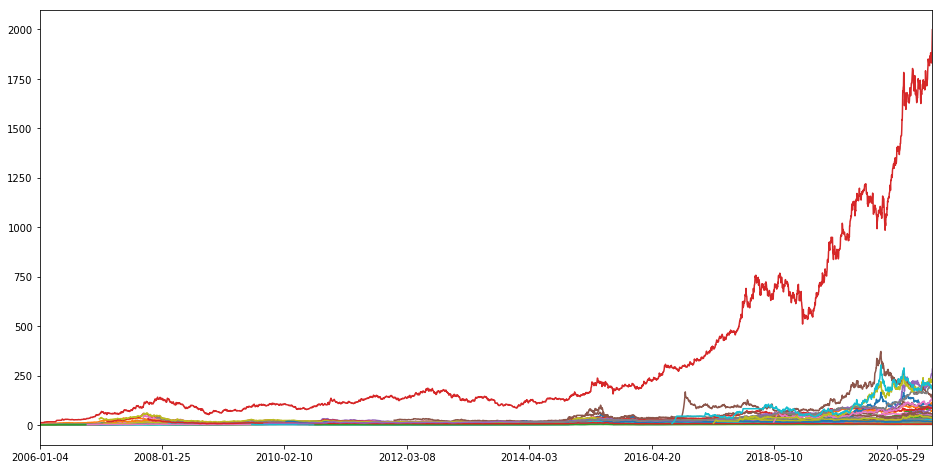

In [4]:
# load the data in and drop the stocks which contains "NaN"
data = pd.read_csv("closePrice2006to2020.csv",engine="python",index_col = 0)
#plt.figure(figsize=(16,16))

ax = data.plot(legend = False,figsize=(16,8))
#ax.figsize=(12,16)
fig = ax.get_figure()
fig.savefig('SZ50.jpg')

In [5]:
df = data.dropna(axis=1,how="any")
print(df.shape)
# show the first five data
df.iloc[:5]

(3647, 22)


,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600519.SH,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH
2006-01-04,1.211665,10.053958,0.768283,1.598013,1.301844,0.407829,2.655821,1.921212,1.44870,1.791303,...,11.776235,0.638029,0.470325,2.075825,0.679533,0.715475,0.162670,1.648288,1.834476,1.129146
2006-01-05,1.231761,11.060038,0.768283,1.598013,1.331657,0.404247,2.740191,1.948082,1.50138,1.787564,...,11.903891,0.678713,0.479317,2.112855,0.676891,0.731029,0.162670,1.639567,1.887604,1.131453
2006-01-06,1.267225,10.888936,0.770091,1.591284,1.351532,0.409024,2.780542,1.954799,1.50138,1.813741,...,12.028887,0.689243,0.484713,2.106320,0.697363,0.731029,0.159982,1.657009,1.853227,1.131453
2006-01-09,1.251857,10.888936,0.762860,1.577827,1.438487,0.407232,2.751196,1.954799,1.52333,1.821221,...,12.443768,0.758168,0.494605,2.178201,0.688778,0.753495,0.161998,1.700615,1.859478,1.194525
2006-01-10,1.255403,10.888936,0.761053,1.591284,1.436003,0.400664,2.853907,1.941364,1.52772,1.813741,...,12.491639,0.773006,0.498202,2.250081,0.709580,0.750039,0.164015,1.709336,1.881354,1.172988


In [6]:
print(df.columns)

Index(['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH',
       '600585.SH', '600588.SH', '600690.SH', '600703.SH', '600745.SH',
       '600837.SH', '600887.SH'],
      dtype='object')


In [7]:
# calculate the log return and drop the first row which is empty
df1=np.log(df).diff(axis=0)
df2=df1.dropna(axis=0,how="any")
df2

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600519.SH,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH
2006-01-05,0.016449,0.095372,0.000000,0.000000,0.022642,-0.008824,3.127379e-02,0.013889,0.035718,-0.002090,...,0.010782,0.061815,0.018940,0.017681,-0.003895,0.021506,0.000000,-0.005305,0.028549,0.002042
2006-01-06,0.028384,-0.015591,0.002350,-0.004219,0.014815,0.011748,1.461820e-02,0.003442,0.000000,0.014538,...,0.010446,0.015396,0.011194,-0.003098,0.029796,0.000000,-0.016667,0.010582,-0.018380,0.000000
2006-01-09,-0.012201,0.000000,-0.009434,-0.008493,0.062353,-0.004389,-1.061018e-02,0.000000,0.014514,0.004115,...,0.033909,0.095310,0.020203,0.033557,-0.012387,0.030270,0.012526,0.025975,0.003367,0.054246
2006-01-10,0.002829,0.000000,-0.002372,0.008493,-0.001729,-0.016261,3.665332e-02,-0.006897,0.002878,-0.004115,...,0.003840,0.019382,0.007246,0.032467,0.029754,-0.004598,0.012371,0.005115,0.011696,-0.018194
2006-01-11,0.002821,0.000000,-0.011948,-0.032226,-0.005204,-0.037970,-1.293679e-02,-0.017452,0.014266,0.036441,...,-0.008767,0.000000,-0.027449,0.005792,0.002324,-0.020955,-0.008230,-0.010257,-0.016751,0.019481
2006-01-12,0.005618,0.000000,0.004796,0.021599,0.017242,0.006173,0.000000e+00,0.000000,0.000000,0.015779,...,0.009406,-0.025080,0.040005,-0.028308,0.093029,0.014019,0.016394,0.005141,-0.003384,0.004492
2006-01-13,-0.027451,0.000000,-0.024214,-0.015070,0.048383,-0.004626,0.000000e+00,0.000000,-0.017143,0.011673,...,0.010161,0.000000,0.045304,-0.003968,0.071021,-0.009324,0.020121,0.025318,0.000000,0.017138
2006-01-16,-0.034166,0.000000,-0.042560,-0.002172,-0.031434,-0.036196,0.000000e+00,-0.024957,-0.008683,-0.019532,...,-0.019782,0.048941,0.026892,0.000000,0.000000,-0.023698,-0.008000,-0.025318,-0.038001,-0.039145
2006-01-17,0.022583,0.000000,0.010178,0.025752,0.011696,-0.003210,0.000000e+00,-0.007246,0.000000,-0.003953,...,-0.010799,-0.028205,-0.030305,0.000000,0.000000,0.000000,-0.016195,0.005115,-0.005296,0.020726
2006-01-18,0.061196,0.000000,0.037271,0.023038,0.039093,0.020685,0.000000e+00,0.025136,0.022990,0.013766,...,0.002386,0.028810,0.010204,0.000000,0.000000,0.019003,0.036076,0.010152,0.019282,0.022188


In [8]:
# generate a time_slot list for each month
time_period=[]
for y in range(6,21):
    for m in range(1,13):
        if y<10:
            if m < 10:
                period="200"+str(y)+"-"+"0"+str(m)
            else:
                period="200"+str(y)+"-"+str(m)    
        else:
            if m < 10:
                period="20"+str(y)+"-"+"0"+str(m)
            else:
                period="20"+str(y)+"-"+str(m)   
        time_period.append(period)
time_period

['2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '2007-01',
 '2007-02',
 '2007-03',
 '2007-04',
 '2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2008-01',
 '2008-02',
 '2008-03',
 '2008-04',
 '2008-05',
 '2008-06',
 '2008-07',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '20

In [9]:
# generate two empty dict for storing each month's data
return_dict={}
cov_dict = {}
for i in range(len(time_period)):
    if i == len(time_period)-1:
        temp=df2[df2.index>time_period[i]]
    else:
        temp=df2[np.logical_and(df2.index>time_period[i],df2.index<time_period[i+1])]
    cov_dict[time_period[i]]=np.cov(temp,rowvar=False)
    return_dict[time_period[i]]=temp.apply(lambda x:x.sum(),axis=0)

In [10]:
cov_dict

{'2006-01': array([[ 5.85985492e-04,  4.02389992e-05,  3.91716755e-04,
          2.51918091e-04,  1.48445312e-04,  2.35468063e-04,
          5.37767703e-05,  2.39741415e-04,  2.72415246e-04,
          6.61025225e-05, -3.45667134e-06,  4.60263403e-04,
          9.14065432e-05, -2.41132156e-04, -1.34075540e-04,
         -3.50515022e-05, -1.23522425e-04,  1.00364326e-04,
          6.33909804e-05,  7.00118042e-05,  1.52630180e-04,
          1.89715057e-04],
        [ 4.02389992e-05,  6.33877783e-04, -1.29132136e-05,
         -2.09991845e-05,  4.52601694e-05, -6.04603947e-05,
          1.71891131e-04,  8.81162375e-05,  2.13925498e-04,
         -7.71692112e-05, -4.73771463e-05, -1.75688440e-04,
          4.39044959e-05,  2.62495130e-04,  8.89181585e-05,
          1.01079353e-04, -1.48105688e-04,  1.36214156e-04,
          1.66816542e-05, -1.61735731e-05,  2.22445555e-04,
         -4.15732301e-05],
        [ 3.91716755e-04, -1.29132136e-05,  5.00183962e-04,
          1.32767383e-04,  1.082634

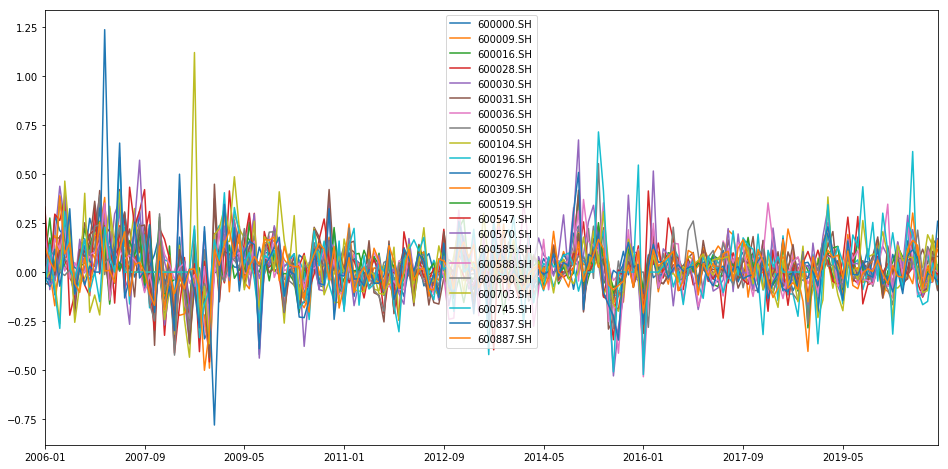

In [11]:
ret_df = pd.DataFrame.from_dict(return_dict)
ret_df.T.plot(figsize=(16,8))

# Apply Risk-Parity model

In [12]:
from scipy.optimize import minimize

# annualized the return and volatility
V = np.matrix(cov_dict[time_period[1]])*144
R = (np.matrix(return_dict[time_period[1]]).T)*12

def calculate_portfolio_var(w,V):
    # 计算组合风险的函数
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

def calculate_risk_contribution(w,V):
    # 计算单个资产对总体风险贡献度的函数
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # 边际风险贡献
    MRC = V*w.T
    # 风险贡献
    RC = np.multiply(MRC,w.T)/sigma
    return RC

def risk_budget_objective(x,pars):
    # 计算组合风险
    V = pars[0]# 协方差矩阵
    x_t = pars[1] # 组合中资产预期风险贡献度的目标向量
    sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0] # sum of squared error
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x

def calcu_w(x):
    w0 = np.ones([1,R.shape[0]])/R.shape[0]
#     x_t = [1/22,1/22,...,1/22] # 目标是让22个资产风险贡献度相等，即都为1/22
    x_t = x 
    cons = ({'type': 'eq', 'fun': total_weight_constraint},
    {'type': 'ineq', 'fun': long_only_constraint})
    res = minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
    #w_rb = np.asmatrix(res.x)
    w_rb = res.x
    return w_rb

In [13]:
weight_array=[]
for i in range(len(time_period)):
    V = np.matrix(cov_dict[time_period[i]])*144
    R = (np.matrix(return_dict[time_period[i]]).T)*12
    weight_array.append(calcu_w(np.ones([1,R.shape[0]])/R.shape[0]))
weight_matrix=np.mat(weight_array)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.8035020117887204e-05
            Iterations: 8
            Function evaluations: 192
            Gradient evaluations: 8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.471089502253304e-05
            Iterations: 19
            Function evaluations: 456
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.019411548820481e-05
            Iterations: 12
            Function evaluations: 289
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.54845334853406e-05
            Iterations: 35
            Function evaluations: 840
            Gradient evaluations: 35
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4906804701413506e-06
            Iterations: 23
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.0202315265929827e-06
            Iterations: 16
            Function evaluations: 385
            Gradient evaluations: 16
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.821809369209107e-06
            Iterations: 16
            Function evaluations: 385
            Gradient evaluations: 16
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.437411428478352e-06
            Iterations: 22
            Function evaluations: 529
            Gradient evaluations: 22
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.784309587295439e-05
            Iterations: 8
            Function evaluations: 193
            Gradient evaluations: 8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.994903075796239e-06
            Iterations: 17
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1243517274736476e-05
            Iterations: 9
            Function evaluations: 217
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3321159963693792e-05
            Iterations: 9
            Function evaluations: 217
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.324790073889777e-06
            Iterations: 11
            Function evaluations: 264
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0919489905768649e-05
            Iterations: 4
            Function evaluations: 97
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.996116438303274e-05
            Iterations: 9
     

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.330006423305044e-05
            Iterations: 28
            Function evaluations: 673
            Gradient evaluations: 28
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0001218651777184847
            Iterations: 13
            Function evaluations: 313
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.9727808028822895e-05
            Iterations: 7
            Function evaluations: 168
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0002209375268239961
            Iterations: 9
            Function evaluations: 217
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.446542018141379e-05
            Iterations: 18
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.406641383704431e-06
            Iterations: 24
            Function evaluations: 576
            Gradient evaluations: 24
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4114833754486559e-06
            Iterations: 18
            Function evaluations: 433
            Gradient evaluations: 18
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.2819579844434586e-06
            Iterations: 20
            Function evaluations: 481
            Gradient evaluations: 20
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.1066383858525648e-06
            Iterations: 17
            Function evaluations: 409
            Gradient evaluations: 17
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.542872546392966e-06
            Iterations: 

In [14]:
weight_matrix

matrix([[0.02870946, 0.04478129, 0.04420281, ..., 0.03122714, 0.02791538,
         0.03528855],
        [0.06403005, 0.05497414, 0.04258429, ..., 0.02525753, 0.03184258,
         0.02143014],
        [0.07531379, 0.02587731, 0.02362588, ..., 0.06747206, 0.02158732,
         0.07098428],
        ...,
        [0.09113843, 0.0830781 , 0.10165663, ..., 0.03161442, 0.03003388,
         0.02108757],
        [0.06722597, 0.0585939 , 0.06471353, ..., 0.02899208, 0.03472765,
         0.03837977],
        [0.05677787, 0.02833421, 0.06680081, ..., 0.05997106, 0.03761095,
         0.04217121]])

# Benchmark Calculation

In [15]:
mon_rt = pd.DataFrame.from_dict(return_dict, orient = "index")

In [16]:
mon_rt

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600519.SH,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH
2006-01,0.094867,0.088542,0.039221,0.047285,0.288159,-0.057245,0.058998,-0.003503,0.111704,0.101176,...,0.064708,0.332069,0.099992,0.054122,0.209642,0.033257,-0.042200,-0.088455,-0.027636,0.132509
2006-02,0.078472,0.000623,0.173991,0.060388,-0.089746,-0.064022,0.093173,-0.046687,-0.038679,-0.072368,...,0.276239,-0.038962,-0.064308,0.146739,0.001772,0.080761,0.000000,0.140013,-0.039291,0.057954
2006-03,-0.115530,-0.172280,0.009461,-0.046430,0.174729,0.175411,-0.039639,-0.007380,-0.017046,-0.026723,...,0.000000,0.295971,-0.041437,-0.014888,0.170452,0.108158,-0.053110,-0.100348,0.116771,0.005055
2006-04,0.000000,0.072976,0.122168,0.183970,0.438636,0.173965,0.111717,0.054067,0.017046,0.067198,...,0.383875,0.263724,0.068736,0.112435,0.115902,0.000000,-0.263729,-0.287682,-0.072240,0.390000
2006-05,0.189944,0.071064,0.027844,0.062271,0.255824,0.245730,0.005548,0.066641,0.363918,0.369496,...,0.185600,0.374100,0.409645,0.236107,0.229645,-0.017168,0.464813,0.309661,0.081917,0.093376
2006-06,-0.006036,0.093785,0.000000,-0.017570,0.038615,0.271369,0.075740,0.033334,0.191235,0.055742,...,-0.012152,-0.220370,0.135855,-0.027183,-0.034757,0.012903,0.167340,0.016173,0.323566,0.149263
2006-07,-0.118793,-0.051257,-0.058910,-0.078178,-0.161029,-0.216391,-0.046458,-0.072837,-0.025931,-0.111403,...,-0.075276,-0.111613,-0.115754,-0.068613,0.048698,-0.064179,-0.256720,-0.032612,-0.112117,-0.057804
2006-08,0.110687,0.011490,0.042762,0.060421,0.035941,0.089094,0.151040,0.030637,-0.063255,-0.046520,...,0.027571,0.070257,0.167564,0.115612,-0.013005,0.038862,-0.067252,0.064193,0.020135,-0.103245
2006-09,0.077300,0.013783,0.225930,0.106526,0.075599,0.251928,0.168515,0.074724,-0.028384,0.029542,...,0.047494,-0.067164,-0.004216,0.075002,0.003267,0.164982,0.402562,0.171032,-0.066978,0.074476
2006-10,0.274889,0.126391,0.095479,0.192384,-0.016841,0.158000,0.046200,0.134531,0.030248,-0.036621,...,0.129544,-0.121311,0.111818,0.155624,0.090810,0.085585,-0.205852,-0.101003,0.029748,-0.076540


In [17]:
mon_rt.to_csv("mon_rt.csv", index = True, header = True)

In [18]:
mon_rt['price_weighted_return'] = mon_rt.mean(axis = 1)

In [19]:
mon_rt

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH,price_weighted_return
2006-01,0.094867,0.088542,0.039221,0.047285,0.288159,-0.057245,0.058998,-0.003503,0.111704,0.101176,...,0.332069,0.099992,0.054122,0.209642,0.033257,-0.042200,-0.088455,-0.027636,0.132509,0.071679
2006-02,0.078472,0.000623,0.173991,0.060388,-0.089746,-0.064022,0.093173,-0.046687,-0.038679,-0.072368,...,-0.038962,-0.064308,0.146739,0.001772,0.080761,0.000000,0.140013,-0.039291,0.057954,0.024671
2006-03,-0.115530,-0.172280,0.009461,-0.046430,0.174729,0.175411,-0.039639,-0.007380,-0.017046,-0.026723,...,0.295971,-0.041437,-0.014888,0.170452,0.108158,-0.053110,-0.100348,0.116771,0.005055,0.040727
2006-04,0.000000,0.072976,0.122168,0.183970,0.438636,0.173965,0.111717,0.054067,0.017046,0.067198,...,0.263724,0.068736,0.112435,0.115902,0.000000,-0.263729,-0.287682,-0.072240,0.390000,0.102162
2006-05,0.189944,0.071064,0.027844,0.062271,0.255824,0.245730,0.005548,0.066641,0.363918,0.369496,...,0.374100,0.409645,0.236107,0.229645,-0.017168,0.464813,0.309661,0.081917,0.093376,0.202601
2006-06,-0.006036,0.093785,0.000000,-0.017570,0.038615,0.271369,0.075740,0.033334,0.191235,0.055742,...,-0.220370,0.135855,-0.027183,-0.034757,0.012903,0.167340,0.016173,0.323566,0.149263,0.059980
2006-07,-0.118793,-0.051257,-0.058910,-0.078178,-0.161029,-0.216391,-0.046458,-0.072837,-0.025931,-0.111403,...,-0.111613,-0.115754,-0.068613,0.048698,-0.064179,-0.256720,-0.032612,-0.112117,-0.057804,-0.083812
2006-08,0.110687,0.011490,0.042762,0.060421,0.035941,0.089094,0.151040,0.030637,-0.063255,-0.046520,...,0.070257,0.167564,0.115612,-0.013005,0.038862,-0.067252,0.064193,0.020135,-0.103245,0.036926
2006-09,0.077300,0.013783,0.225930,0.106526,0.075599,0.251928,0.168515,0.074724,-0.028384,0.029542,...,-0.067164,-0.004216,0.075002,0.003267,0.164982,0.402562,0.171032,-0.066978,0.074476,0.090429
2006-10,0.274889,0.126391,0.095479,0.192384,-0.016841,0.158000,0.046200,0.134531,0.030248,-0.036621,...,-0.121311,0.111818,0.155624,0.090810,0.085585,-0.205852,-0.101003,0.029748,-0.076540,0.057154


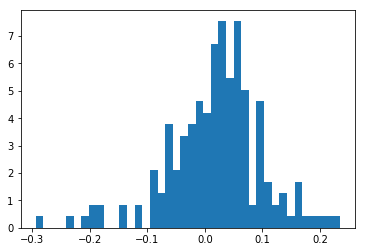

In [20]:
plt.clf()
plt.hist(mon_rt['price_weighted_return'], bins = 40, density = True)
plt.show()

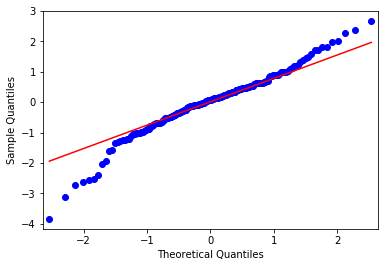

In [21]:
fig1 = qqplot(mon_rt['price_weighted_return'], line='q', dist = stats.norm, fit = True)               
plt.show()

In [22]:
mon_rt_sort_values = mon_rt.sort_values('price_weighted_return', ascending = True)

In [23]:
mon_rt_sort_values

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH,price_weighted_return
2008-10,-0.285550,-0.490910,-0.247170,-0.458830,-0.327786,-0.372179,-0.410301,-0.126505,-0.322494,-0.266137,...,-0.161056,-0.310235,-0.436046,-0.307905,-0.137459,-0.366139,-0.092924,-0.154461,-0.297790,-0.293748
2016-01,-0.077947,-0.132371,-0.115322,-0.124357,-0.288544,-0.313338,-0.182433,-0.422601,-0.130708,-0.255703,...,-0.229713,-0.424758,-0.261897,-0.535008,0.000000,-0.238395,-0.523843,-0.267243,-0.208342,-0.236055
2008-06,-0.245439,-0.324298,-0.235003,-0.277619,-0.358680,-0.312980,-0.236209,-0.368039,-0.435238,-0.176931,...,-0.165531,-0.196587,-0.363677,-0.056642,-0.295417,0.000000,0.000000,0.016549,0.012943,-0.204296
2008-03,-0.174048,-0.270247,-0.246948,-0.338120,-0.180097,-0.351741,0.006236,-0.170780,-0.317460,-0.112507,...,-0.414407,-0.222772,-0.219023,-0.036743,-0.424396,0.000000,0.000000,-0.299270,-0.110049,-0.195290
2009-08,-0.420670,-0.246477,-0.359964,-0.256889,-0.439702,-0.155002,-0.365295,-0.293432,-0.163824,0.046676,...,-0.240670,-0.032740,-0.208736,-0.222244,0.029194,-0.190901,-0.258986,-0.391831,0.038549,-0.189990
2015-07,-0.118152,-0.114869,-0.078173,-0.162686,-0.258026,-0.241631,-0.042300,-0.159160,-0.105376,-0.113301,...,-0.345746,-0.530655,-0.139342,-0.158118,-0.287793,-0.165342,-0.509729,-0.224796,-0.090770,-0.186627
2008-08,-0.033127,-0.055983,0.019934,-0.091567,-0.116733,-0.307370,-0.023974,-0.301924,-0.224073,-0.268322,...,-0.406582,-0.095384,-0.205558,-0.176253,-0.130028,-0.298855,-0.335226,-0.284602,-0.079591,-0.175614
2007-11,-0.124846,-0.095785,-0.117930,-0.200542,-0.233272,-0.374494,-0.147101,-0.072439,-0.091207,-0.054283,...,-0.296069,-0.189757,-0.235112,-0.123261,-0.249648,0.000000,0.000000,-0.205436,-0.169838,-0.145776
2013-06,-0.180710,-0.134789,-0.181053,-0.183219,-0.248679,-0.207306,-0.108575,-0.186586,-0.168218,-0.172252,...,0.000000,-0.062035,-0.216423,-0.202804,-0.119828,0.033129,-0.421666,-0.255452,0.112920,-0.139336
2015-08,-0.007326,-0.024180,-0.058907,-0.192372,-0.309050,-0.097942,-0.014556,0.056530,-0.107324,-0.125655,...,0.010245,-0.280878,-0.020575,-0.414441,-0.107549,-0.200043,0.000000,-0.347580,-0.068951,-0.112756


## Calculate VaR and ES

In [24]:
len(mon_rt_sort_values['price_weighted_return'])

180

In [25]:
ValueLocForPercentile_90 = math.ceil(len(mon_rt_sort_values['price_weighted_return']) * (1 - 0.9))
VaR_90 = mon_rt_sort_values['price_weighted_return'][ValueLocForPercentile_90-1]
ES_90 = mon_rt_sort_values['price_weighted_return'][0: (ValueLocForPercentile_90-1)].mean()
print(VaR_90)
print(ES_90)

-0.07858836077666509
-0.14698815039557245


In [26]:
ValueLocForPercentile_95 = math.ceil(len(mon_rt_sort_values['price_weighted_return']) * (1 - 0.95))
VaR_95 = mon_rt_sort_values['price_weighted_return'][ValueLocForPercentile_95-1]
ES_95 = mon_rt_sort_values['price_weighted_return'][0: (ValueLocForPercentile_95-1)].mean()
print(VaR_95)
print(ES_95)

-0.11275604953139738
-0.1963036102459151


In [27]:
ValueLocForPercentile_99 = math.ceil(len(mon_rt_sort_values['price_weighted_return']) * (1 - 0.99))
VaR_99 = mon_rt_sort_values['price_weighted_return'][ValueLocForPercentile_99-1]
ES_99 = mon_rt_sort_values['price_weighted_return'][0: (ValueLocForPercentile_99-1)].mean()
print(VaR_99)
print(ES_99)

-0.2360546264447547
-0.2937477363822896


In [28]:
print(tabulate([["90%", VaR_90, ES_90],["95%", VaR_95, ES_95], ["99%", VaR_99, ES_99]], headers = ['Confidence Level', 'Value at Risk', 'Expected Shortfall']))

NameError: name 'tabulate' is not defined

## Metrics

In [29]:
import numpy as np
import empyrical

In [30]:
'''
weight_matrix: 权重矩阵  格式：pd.Dataframe
return_matrix：收益率矩阵 格式：pd.Dataframe
significant_level：显著性水平 格式: float (0~1)
'''
def calIndicator(weight_matrix, return_matrix, significant_level):

    tmp_return_matrix = return_matrix[return_matrix.index.isin(weight_matrix.index)]
    tmp_return_matrix = tmp_return_matrix * weight_matrix
    myReturn = tmp_return_matrix.apply(lambda x: x.sum(), 1)
    net_value, annual_ret, annual_vol, ret_to_risk, win_rate, max_drawdown = BKtest_indicators(myReturn)
    VaR = np.percentile(myReturn.dropna(), significant_level*100)
    ES = myReturn[myReturn <= VaR].mean()
    print('回测结果：')
    print('年化收益率', annual_ret)
    print('年化波动率', annual_vol)
    print('收益风险比', ret_to_risk)
    print('胜率', win_rate)
    print('最大回撤', max_drawdown)
    print('VaR', VaR)
    print('ES', ES)
    print('=======================')
    return net_value

'''
my_return: 组合月收益率序列
'''
def BKtest_indicators(my_return):
    annual_ret = empyrical.annual_return(my_return, period='monthly')
    annual_vol = np.std(my_return) * np.sqrt(12)
    ret_to_risk = empyrical.annual_return(my_return, period='monthly') / (np.std(my_return) * np.sqrt(12))
    win_rate = np.sum(my_return > 0) / len(my_return)  # 胜率
    net_value = (1 + my_return).cumprod()
    max_drawdown = np.min(net_value / net_value.cummax() - 1)  # 最大回撤
    return net_value, annual_ret, annual_vol, ret_to_risk, win_rate, max_drawdown

In [31]:
mon_rt = mon_rt.drop(columns = ['price_weighted_return'])

In [32]:
weight_matrix_benchmark = np.ones(mon_rt.shape)*1/mon_rt.shape[1]

In [33]:
mon_rt.columns

Index(['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH',
       '600585.SH', '600588.SH', '600690.SH', '600703.SH', '600745.SH',
       '600837.SH', '600887.SH'],
      dtype='object')

In [34]:
weight_matrix = pd.DataFrame(weight_matrix, columns = mon_rt.columns, index = mon_rt.index )
weight_matrix_benchmark = pd.DataFrame(weight_matrix_benchmark, columns = mon_rt.columns, index = mon_rt.index )

In [35]:
weight_matrix

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600519.SH,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH
2006-01,2.870946e-02,0.044781,0.044203,5.747929e-02,2.082130e-02,0.041893,6.772847e-02,0.035797,0.043440,0.065242,...,3.496063e-02,7.157593e-02,0.039668,6.757547e-02,6.837936e-02,0.031880,0.039081,3.122714e-02,2.791538e-02,3.528855e-02
2006-02,6.403005e-02,0.054974,0.042584,3.046862e-02,2.846075e-02,0.034383,1.219998e-01,0.068045,0.034654,0.030697,...,3.900808e-02,3.103432e-02,0.026280,4.056595e-02,3.709035e-02,0.065225,0.065836,2.525753e-02,3.184258e-02,2.143014e-02
2006-03,7.531379e-02,0.025877,0.023626,3.658830e-02,2.110728e-02,0.036859,2.986850e-02,0.073624,0.070930,0.068864,...,5.892069e-02,1.186823e-02,0.039436,2.840589e-02,2.567631e-02,0.071318,0.051441,6.747206e-02,2.158732e-02,7.098428e-02
2006-04,1.352064e-01,0.028377,0.013513,1.503070e-02,7.430594e-03,0.026495,1.527739e-02,0.171981,0.030970,0.147062,...,2.624105e-02,3.809091e-02,0.063868,3.984510e-02,1.153998e-02,0.135206,0.015473,2.451557e-02,1.353782e-02,2.365761e-02
2006-05,4.644969e-02,0.039530,0.096868,3.454543e-02,2.099461e-02,0.013575,5.214650e-02,0.032791,0.027580,0.025336,...,4.857922e-02,1.821568e-02,0.023245,3.258648e-02,1.595554e-02,0.053185,0.156782,6.919520e-02,2.966988e-02,2.357994e-02
2006-06,3.185877e-02,0.106882,0.037675,6.028580e-02,2.340422e-02,0.029681,4.312790e-02,0.071971,0.033734,0.031688,...,5.826563e-02,2.796663e-02,0.024808,5.686983e-02,2.785152e-02,0.047477,0.042339,3.648452e-02,2.324941e-02,3.602849e-02
2006-07,4.531409e-02,0.074249,0.040391,5.396965e-02,1.944598e-02,0.024816,4.724742e-02,0.069681,0.071174,0.027883,...,9.061370e-02,2.110445e-02,0.033699,6.213112e-02,3.956166e-02,0.062330,0.035562,3.380653e-02,1.984349e-02,4.364342e-02
2006-08,6.027025e-02,0.063959,0.055871,6.052686e-02,3.252724e-02,0.024755,6.224953e-02,0.060574,0.020432,0.033233,...,6.494301e-02,2.315336e-02,0.027309,6.260140e-02,2.723418e-02,0.058259,0.025682,5.950558e-02,2.932206e-02,6.018757e-02
2006-09,4.934099e-02,0.061205,0.037421,4.676817e-02,2.279603e-02,0.031971,3.813258e-02,0.059452,0.022279,0.052229,...,6.491408e-02,6.317754e-02,0.048508,3.131494e-02,3.357438e-02,0.060838,0.025245,5.281719e-02,4.206640e-02,6.276825e-02
2006-10,1.970163e-02,0.123567,0.020995,6.027044e-02,2.101237e-02,0.038052,2.635360e-02,0.025053,0.053520,0.022931,...,3.364920e-02,7.432113e-02,0.033292,2.315347e-02,4.189081e-02,0.077661,0.068200,5.908623e-02,9.072461e-02,2.833370e-02


In [36]:
weight_matrix_benchmark

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,...,600519.SH,600547.SH,600570.SH,600585.SH,600588.SH,600690.SH,600703.SH,600745.SH,600837.SH,600887.SH
2006-01,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-02,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-03,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-04,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-05,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-06,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-07,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-08,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-09,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2006-10,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455


In [37]:
import empyrical
net_value = calIndicator(weight_matrix, mon_rt, 0.01)
net_value.to_csv('risk_parity_net_value.csv')
net_value = calIndicator(weight_matrix_benchmark, mon_rt, 0.01)
net_value.to_csv('benchmark_net_value.csv')

回测结果：
年化收益率 0.2131997597405677
年化波动率 0.2390328899800131
收益风险比 0.8919264614940419
胜率 0.6444444444444445
最大回撤 -0.4451656599734589
VaR -0.18232105990814568
ES -0.24687836688284492
回测结果：
年化收益率 0.19691917551370297
年化波动率 0.28193965879620636
收益风险比 0.698444398898991
胜率 0.65
最大回撤 -0.6661491741627474
VaR -0.21096565184701743
ES -0.26490118141352215


D:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [38]:
net_value = calIndicator(weight_matrix, mon_rt, 0.05)
net_value = calIndicator(weight_matrix_benchmark, mon_rt, 0.05)

回测结果：
年化收益率 0.2131997597405677
年化波动率 0.2390328899800131
收益风险比 0.8919264614940419
胜率 0.6444444444444445
最大回撤 -0.4451656599734589
VaR -0.07325151868151765
ES -0.154575861140971
回测结果：
年化收益率 0.19691917551370297
年化波动率 0.28193965879620636
收益风险比 0.698444398898991
胜率 0.65
最大回撤 -0.6661491741627474
VaR -0.11408505526045834
ES -0.1963036102459151


In [39]:
net_value = calIndicator(weight_matrix, mon_rt, 0.1)
net_value = calIndicator(weight_matrix_benchmark, mon_rt, 0.1)

回测结果：
年化收益率 0.2131997597405677
年化波动率 0.2390328899800131
收益风险比 0.8919264614940419
胜率 0.6444444444444445
最大回撤 -0.4451656599734589
VaR -0.05717768458055564
ES -0.10987048448771766
回测结果：
年化收益率 0.19691917551370297
年化波动率 0.28193965879620636
收益风险比 0.698444398898991
胜率 0.65
最大回撤 -0.6661491741627474
VaR -0.07275471666267667
ES -0.1431881620834109


# Stock crisis

In [40]:
start_index = list(weight_matrix.index).index('2007-10')
end_index = list(weight_matrix.index).index('2008-12')
net_value = calIndicator(weight_matrix.iloc[start_index : end_index,:], mon_rt, 0.05)
net_value.to_csv('stock_crisis_risk_parity_net_value.csv')
net_value = calIndicator(weight_matrix_benchmark.iloc[start_index : end_index,:], mon_rt, 0.05)
net_value.to_csv('stock_crisis_benchmark_net_value.csv')

回测结果：
年化收益率 -0.21222151343103257
年化波动率 0.3584273562868467
收益风险比 -0.592090725522617
胜率 0.35714285714285715
最大回撤 -0.4451656599734589
VaR -0.20951317037988137
ES -0.29680628990115654
回测结果：
年化收益率 -0.5670386786364052
年化波动率 0.4407291702448735
收益风险比 -1.2865921225984496
胜率 0.35714285714285715
最大回撤 -0.6661491741627473
VaR -0.23560438772222198
ES -0.2937477363822896


D:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
D:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [41]:
start_index = list(weight_matrix.index).index('2015-05')
end_index = list(weight_matrix.index).index('2016-04')
net_value = calIndicator(weight_matrix.iloc[start_index : end_index,:], mon_rt, 0.05)
net_value = calIndicator(weight_matrix_benchmark.iloc[start_index : end_index,:], mon_rt, 0.05)

回测结果：
年化收益率 -0.20496411601235365
年化波动率 0.32618817039752945
收益风险比 -0.6283615857759691
胜率 0.45454545454545453
最大回撤 -0.3268334940443325
VaR -0.1876913400946677
ES -0.19695044386453328
回测结果：
年化收益率 -0.3531734127171856
年化波动率 0.3829564249324372
收益风险比 -0.922228717743785
胜率 0.36363636363636365
最大回撤 -0.43663041784421275
VaR -0.21134067287553956
ES -0.23605462644475472
